In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.regularizers import l2

In [2]:
input = layers.Input(shape=(32,32,3))

x = layers.Conv2D(64,3,activation='relu')(input)
x = layers.MaxPool2D(2)(x)


x = layers.Conv2D(64,3,activation='relu')(x)
x = layers.MaxPool2D(2)(x)

x= layers.Dropout(0.25)(x)

x = layers.Flatten()(x)

x = layers.Dense(512,activation='relu')(x)


x= layers.Dropout(0.25)(x)

output = layers.Dense(100,activation='softmax')(x)

In [3]:
model = Model(input,output)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)             

In [5]:
from keras.optimizers import Adam
sgd =Adam(lr=0.000625)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
#dataset

!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2020-11-05 13:20:05--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  16.8MB/s    in 11s     

2020-11-05 13:20:17 (15.0 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



In [7]:
!tar --gunzip --extract --verbose --file=cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [8]:
def unpick(file):
  import pickle
  with open(file , 'rb') as f:
    dict = pickle.load(f , encoding = 'bytes')
  return dict

In [9]:
meta = unpick('cifar-100-python/meta')
fine_label_names = [t.decode('utf8') for t in meta[b'fine_label_names']]


<class 'numpy.ndarray'>
(50000,)
(50000, 100)
keyboard


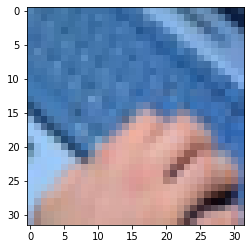

In [10]:



import numpy as np
from keras.utils import to_categorical

train_params = unpick('cifar-100-python/train')

train_label = train_params[b'fine_labels']


train_data = train_params[b'data']

images = []

for d in train_data:
    image = np.zeros((32,32,3), dtype=np.uint8)
    image[...,0] = np.reshape(d[:1024], (32,32)) # Red channel
    image[...,1] = np.reshape(d[1024:2048], (32,32)) # Green channel
    image[...,2] = np.reshape(d[2048:], (32,32)) # Blue channel
    images.append(image)

train_x = np.asarray(images)
train_y = np.asarray(train_label)

y = to_categorical(train_y,num_classes = 100)

print(type(train_x[1]))


print(train_y.shape)
print(y.shape)

#print(train_y)
#print(fine_label_names[10])

import matplotlib.pyplot as plt
plt.imshow(train_x[10])
ty=train_label[10]
print(fine_label_names[ty])

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
10000
(10000, 32, 32, 3)
(10000, 100)
streetcar


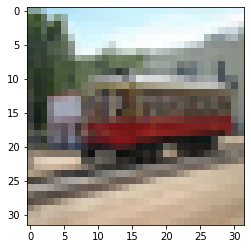

In [11]:

test_params = unpick('cifar-100-python/test')

print(test_params.keys())

test_label = test_params[b'fine_labels']

test_data = test_params[b'data']

imagess = []

for d in test_data:
    image = np.zeros((32,32,3), dtype=np.uint8)
    image[...,0] = np.reshape(d[:1024], (32,32)) # Red channel
    image[...,1] = np.reshape(d[1024:2048], (32,32)) # Green channel
    image[...,2] = np.reshape(d[2048:], (32,32)) # Blue channel
    imagess.append(image)

test_x = np.asarray(imagess)
test_y = np.asarray(test_label)

y_test = to_categorical(test_y,num_classes = 100)

print(len(test_y))

print(test_x.shape)
print(y_test.shape)

import matplotlib.pyplot as plt
plt.imshow(test_x[12])
tee=test_label[12]
print(fine_label_names[tee])

In [12]:
#preprocessing

x_train = train_x.astype('float')
x_test = test_x.astype('float')

x_train = x_train /255
x_test = x_test /255

In [13]:
datagen = ImageDataGenerator(  rotation_range=40,
        
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


In [16]:
trained = model.fit(x_train,train_y,epochs=5,verbose=1,validation_data=(x_test,test_y))


Epoch 1/5
1563/1563 [==============================] - 119s 76ms/step - loss: 0.9527 - accuracy: 0.7154 - val_loss: 2.8929 - val_accuracy: 0.3909
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9558 - accuracy: 0.7155 - val_loss: 3.0504 - val_accuracy: 0.3774
Epoch 3/5
1563/1563 [==============================] - 120s 76ms/step - loss: 0.9480 - accuracy: 0.7194 - val_loss: 2.9590 - val_accuracy: 0.3983
Epoch 4/5
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9515 - accuracy: 0.7195 - val_loss: 2.9974 - val_accuracy: 0.3900
Epoch 5/5
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9376 - accuracy: 0.7197 - val_loss: 2.9840 - val_accuracy: 0.3873


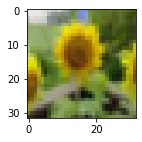

82
sunflower


In [17]:
   
import tensorflow as tf
from keras_preprocessing import image
from keras.utils import np_utils
import numpy as np
#images = image.load_img("/content/girl.jpg", target_size=(32, 32,3)) 
plt.figure(figsize = (2,2))
images = train_x[12]
plt.imshow(train_x[12])
plt.show()
x = image.img_to_array(images)
#x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0
prediction = model.predict(x)
prediction = np.argmax(prediction[0])
print(prediction)
print(fine_label_names[prediction])